In [4]:
# Import pandas module
import pandas as pd

# Set display columns to max to allow us to see all columns in results
pd.set_option('display.max_columns', None)

# Read the loan_clean csv file in
loan = pd.read_csv('loan_clean.csv')

In [5]:
loan.head()

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag
0,0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Dec-2018,Current,debt_consolidation,NY,18.24,0.0,Apr-2001,999.0,9.0,1.0,10.3,34.0,113.98,Individual,NaN,NaN,0.0,16901.0,42000.0,1878.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16901.0,NaN,NaN,N
1,1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Dec-2018,Current,debt_consolidation,LA,26.52,0.0,Jun-1987,71.0,13.0,1.0,24.2,44.0,612.25,Individual,NaN,NaN,0.0,321915.0,50800.0,24763.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,99468.0,NaN,NaN,N
2,2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Dec-2018,Current,debt_consolidation,MI,10.51,0.0,Apr-2011,999.0,8.0,0.0,19.1,13.0,212.79,Individual,NaN,NaN,0.0,110299.0,24100.0,18383.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11749.0,NaN,NaN,N
3,3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Dec-2018,Current,debt_consolidation,WA,16.74,0.0,Feb-2006,999.0,10.0,0.0,78.1,13.0,168.07,Individual,NaN,NaN,0.0,305049.0,7000.0,30505.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36151.0,NaN,NaN,N
4,4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Dec-2018,Current,debt_consolidation,MD,26.35,0.0,Dec-2000,999.0,12.0,0.0,3.6,26.0,660.98,Individual,NaN,NaN,0.0,116007.0,23100.0,9667.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,29674.0,NaN,NaN,N


# Preparing data for Train/Test Split

In [6]:
# Create a function to encode 'acc_now_delinq' to 1 for delinquent and 0 for non-delinquent (to use as the target/result)

def delinq(delinq_count):
    if delinq_count != 0:
        return 1
    else:
        return 0

# Apply the 'acc_now_delinq' column which shows number of delinquent accounts to the function and assigning it to a new column 'delinq_status'
loan['delinq_status'] = loan.acc_now_delinq.apply(delinq)

In [7]:
# Sanity-check to confirm that the encoding worked

loan.groupby('delinq_status')['unique_num'].agg(['count'])

,count
delinq_status,
0,1994496
1,8173


In [8]:
# One-hot encoding categorical features using pd.get_dummies

In [9]:
# Encode sub_grades
sub_grade_dummies = pd.get_dummies(loan.sub_grade, prefix='sub_grade')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
sub_grade_dummies.drop(sub_grade_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades = pd.concat([loan, sub_grade_dummies], axis=1)

In [10]:
# Encode purpose
purpose_dummies = pd.get_dummies(loan.purpose, prefix='purpose')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
purpose_dummies.drop(purpose_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose = pd.concat([loan_grades, purpose_dummies], axis=1)

In [11]:
# Encode addr_state
state_dummies = pd.get_dummies(loan.addr_state, prefix='state')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
state_dummies.drop(state_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose_state = pd.concat([loan_grades_purpose, state_dummies], axis=1)

In [12]:
# Encode emp_length
emplen_dummies = pd.get_dummies(loan.emp_length, prefix='emplen')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
emplen_dummies.drop(emplen_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose_state_emplen = pd.concat([loan_grades_purpose_state, emplen_dummies], axis=1)

In [13]:
loan_encoded = loan_grades_purpose_state_emplen

# Performing Train/Test Split

In [14]:
# Importing relevant modules for the train/test split
from sklearn.model_selection import train_test_split


Based on the analysis done in the EDA stage, we have determined the below features to use in the model:

<u>Numerical</u>
- annual_inc
- dti
- pub_rec_bankruptcies
- pub_rec
- delinq_2yrs
- mths_since_last_delinq
- open_acct
- num_tl_90g_dpd24m

<u>Categorical</u>
- addr_state
- sub_grade
- purpose
- emp_length

Note: The above is the complete list of features used in the testing of predictive models. However, the final features used in the selected best model may not have all the features above.

In [15]:
# Create feature matrix (X), i.e. features or factors that would impact prediction of delinquency

# Create list of feature columns with the numerical features
feature_cols = ['annual_inc', 'dti', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq']


In [16]:
# Use list comprehension to add the dummies columns



In [17]:
len(feature_cols)

5

In [18]:
# Creating feature matrix (X)
X = loan_encoded[feature_cols]

# Creating response vector (y)
y = loan_encoded.delinq_status


In [19]:
# Performing the train/test split with the test set set to 30% of dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Setting up a baseline model and determining baseline accuracy

In [20]:
import numpy as np

# Finding the mode (or most frequent result) in y_train
most_freq_class = y_train.mode().index[0]

# The baseline accuracy is the average number of times that the result in the test set would be the most frequent class
baseline_accuracy = np.mean(y_test == most_freq_class)
baseline_accuracy

# The baseline accuracy is at 99.6%

0.9959320973167488

In [21]:
loan.delinq_status.count()

2002669

In [22]:
loan.delinq_status[loan.delinq_status == 1].count()

8173

In [23]:
8178/2003287

0.004082290755143921

In [24]:
8178/(2003287-8178)

0.004099024163592064

# Creating Oversample set using SMOTE

In [25]:
# Importing SMOTE module
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE oversampling algorithm
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


In [26]:
len(X_train_oversampled)

2792278

# Using the Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Instantiate the model
rf = RandomForestClassifier(n_estimators = 500, max_features='sqrt', random_state=123)

# Fit the model using the oversampled dataset
rf.fit(X_train_oversampled, y_train_oversampled)

# Predict y_train result (whether delinquent or not) using X_train
y_train_pred = rf.predict(X_train)

# Compute accuracy score of model
metrics.accuracy_score(y_train, y_train_pred)

0.9999843066536935

In [28]:
# Compute accuracy, precision, recall, and F1 scores of model
from sklearn.metrics import f1_score, classification_report

report = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,9.999971e-01,0.996866,0.999984,9.984314e-01,9.999843e-01
recall,9.999871e-01,0.999302,0.999984,9.996445e-01,9.999843e-01
f1-score,9.999921e-01,0.998082,0.999984,9.990372e-01,9.999843e-01
support,1.396139e+06,5729.000000,0.999984,1.401868e+06,1.401868e+06


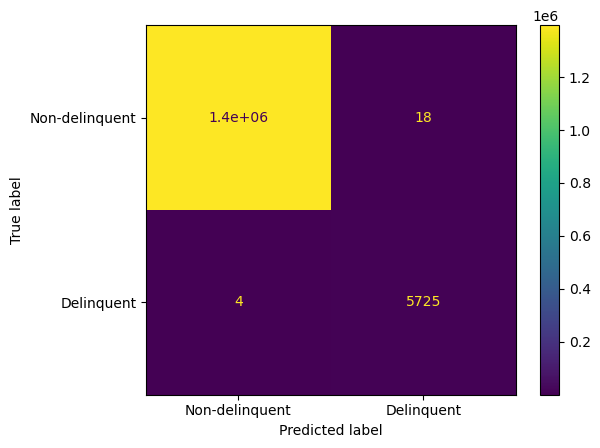

In [29]:
# Import confusion matrix module
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Insert y_train (actual result) and y_train_pred (predicted result) as inputs
confusion_matrix(y_train, y_train_pred)

# Create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred), display_labels = ['Non-delinquent', 'Delinquent']).plot();

In [30]:
# Assigning the confusion matrix to variable 'cm'
cm = confusion_matrix(y_train, y_train_pred)

# Defining False Negative and True Negative and their counts
FN = cm[0, 1]
TN = cm[1, 1]

# Print the various results and calculation
print("False Negative count: ", FN)
print("True Negative count: ", TN)
print("Negative Predictive Value: ", TN/(TN+FN))

False Negative count:  18
True Negative count:  5725
Negative Predictive Value:  0.9968657496082187


In [31]:
# Calculating specificity

# Assign False Positive and True Negative
FP = cm[1, 0]
TN = cm[1, 1]

# Print specificity
print("False Positive count: ", FP)
print("True Negative count: ", TN)
print("Specificity: ", TN/(FP+TN))

False Positive count:  4
True Negative count:  5725
Specificity:  0.9993017978704835


In [32]:
# Using feature importances to determine the importance of each feature
importances = rf.feature_importances_
columns = X.columns

i = 0

while i < len(columns):
    print(f"The importance of feature {columns[i]} is {round(importances[i] * 100, 2)}%")
    i += 1

The importance of feature annual_inc is 0.92%
The importance of feature dti is 0.68%
The importance of feature pub_rec_bankruptcies is 1.89%
The importance of feature delinq_2yrs is 29.71%
The importance of feature mths_since_last_delinq is 66.81%


# Testing the model on the Test Set

In [33]:
# Predict y (result of whether delinquent or not) using the model and X_test
y_pred = rf.predict(X_test)

# Compute accuracy score
metrics.accuracy_score(y_test, y_pred)

0.9971721085683946

In [34]:
# Compute accuracy, precision, recall, and F1 scores of model

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.999107,0.621138,0.997172,0.810122,0.997569
recall,0.998053,0.781506,0.997172,0.889779,0.997172
f1-score,0.998580,0.692154,0.997172,0.845367,0.997333
support,598357.000000,2444.000000,0.997172,600801.000000,600801.000000


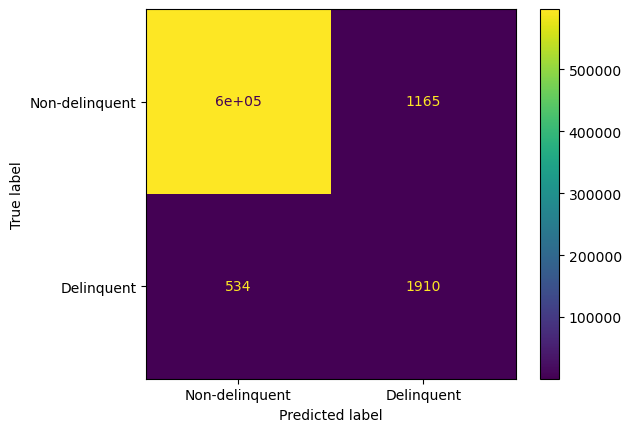

In [35]:
# Insert y_test (actual result) and y_pred (predicted result) as inputs
confusion_matrix(y_test, y_pred)

# Create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Non-delinquent', 'Delinquent']).plot();

In [36]:
# Assigning the confusion matrix to variable 'cm'
cm = confusion_matrix(y_test, y_pred)

# Defining False Negative and True Negative and their counts
FN = cm[0, 1]
TN = cm[1, 1]

# Print the various results and calculation
print("False Negative count: ", FN)
print("True Negative count: ", TN)
print("Negative Predictive Value: ", TN/(TN+FN))

False Negative count:  1165
True Negative count:  1910
Negative Predictive Value:  0.6211382113821138


In [37]:
# Using feature importances to determine the importance of each feature
importances = rf.feature_importances_
columns = X.columns

i = 0

while i < len(columns):
    print(f"The importance of feature {columns[i]} is {round(importances[i] * 100, 2)}%")
    i += 1

The importance of feature annual_inc is 0.92%
The importance of feature dti is 0.68%
The importance of feature pub_rec_bankruptcies is 1.89%
The importance of feature delinq_2yrs is 29.71%
The importance of feature mths_since_last_delinq is 66.81%


# Converting results to csv format for visualisation on Tableau

In [38]:
X_train

,annual_inc,dti,pub_rec_bankruptcies,delinq_2yrs,mths_since_last_delinq
904654,50000.0,11.86,0.0,0.0,999.0
438573,60000.0,10.62,0.0,1.0,4.0
1162119,55000.0,24.00,0.0,1.0,13.0
1186659,65000.0,14.75,0.0,2.0,6.0
1879241,75000.0,6.62,2.0,0.0,46.0
...,...,...,...,...,...
1241052,60000.0,34.44,0.0,0.0,41.0
1066306,51000.0,30.47,0.0,0.0,999.0
28030,55000.0,45.80,0.0,0.0,41.0
277869,120000.0,22.20,0.0,0.0,999.0


In [39]:
# Creating a new dataframe to store y_train_pred
rf_X_train = X_train

In [40]:
# Recreating the unique ID for each row by using the index number
rf_X_train['rf_row_num'] = X_train.index

rf_X_train

,annual_inc,dti,pub_rec_bankruptcies,delinq_2yrs,mths_since_last_delinq,rf_row_num
904654,50000.0,11.86,0.0,0.0,999.0,904654
438573,60000.0,10.62,0.0,1.0,4.0,438573
1162119,55000.0,24.00,0.0,1.0,13.0,1162119
1186659,65000.0,14.75,0.0,2.0,6.0,1186659
1879241,75000.0,6.62,2.0,0.0,46.0,1879241
...,...,...,...,...,...,...
1241052,60000.0,34.44,0.0,0.0,41.0,1241052
1066306,51000.0,30.47,0.0,0.0,999.0,1066306
28030,55000.0,45.80,0.0,0.0,41.0,28030
277869,120000.0,22.20,0.0,0.0,999.0,277869


In [41]:
# Drop all columns except for row_num
rf_X_train = rf_X_train.drop(columns=['annual_inc', 'dti', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq'])

In [42]:
# Add y_train_pred as a new column
rf_X_train['rf_y_train_pred'] = y_train_pred

In [43]:
rf_X_train

,rf_row_num,rf_y_train_pred
904654,904654,0
438573,438573,0
1162119,1162119,0
1186659,1186659,0
1879241,1879241,0
...,...,...
1241052,1241052,0
1066306,1066306,0
28030,28030,0
277869,277869,0


In [44]:
# Creating a new dataframe to store y_pred
rf_X_test = X_test

In [45]:
# Recreating the unique ID for each row by using the index number
rf_X_test['rf_row_num'] = X_test.index

rf_X_test

,annual_inc,dti,pub_rec_bankruptcies,delinq_2yrs,mths_since_last_delinq,rf_row_num
293899,110000.0,7.30,0.0,0.0,53.0,293899
1903921,95000.0,31.77,0.0,0.0,999.0,1903921
1356527,40000.0,4.59,0.0,0.0,999.0,1356527
978275,110000.0,13.20,0.0,0.0,90.0,978275
1102855,65000.0,34.86,0.0,0.0,77.0,1102855
...,...,...,...,...,...,...
1969420,66000.0,26.87,0.0,0.0,999.0,1969420
1430190,60000.0,11.14,1.0,0.0,999.0,1430190
825035,75000.0,5.26,0.0,1.0,12.0,825035
570331,37000.0,11.42,0.0,0.0,999.0,570331


In [46]:
# Drop all columns except for row_num
rf_X_test = rf_X_test.drop(columns=['annual_inc', 'dti', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq'])

In [47]:
# Add y_pred as a new column
rf_X_test['rf_y_pred'] = y_pred

In [48]:
rf_X_test

,rf_row_num,rf_y_pred
293899,293899,0
1903921,1903921,0
1356527,1356527,0
978275,978275,0
1102855,1102855,0
...,...,...
1969420,1969420,0
1430190,1430190,0
825035,825035,0
570331,570331,0


In [50]:
# Join loan with rf_X_train

rf_loan = pd.merge(loan, rf_X_train, how='left', left_on='unique_num', right_on='rf_row_num')

In [51]:
rf_loan

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag,delinq_status,rf_row_num,rf_y_train_pred
0,0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Dec-2018,Current,debt_consolidation,NY,18.24,0.0,Apr-2001,999.0,9.0,1.0,10.3,34.0,113.98,Individual,NaN,NaN,0.0,16901.0,42000.0,1878.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16901.0,NaN,NaN,N,0,0.0,0.0
1,1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Dec-2018,Current,debt_consolidation,LA,26.52,0.0,Jun-1987,71.0,13.0,1.0,24.2,44.0,612.25,Individual,NaN,NaN,0.0,321915.0,50800.0,24763.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,99468.0,NaN,NaN,N,0,1.0,0.0
2,2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Dec-2018,Current,debt_consolidation,MI,10.51,0.0,Apr-2011,999.0,8.0,0.0,19.1,13.0,212.79,Individual,NaN,NaN,0.0,110299.0,24100.0,18383.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11749.0,NaN,NaN,N,0,2.0,0.0
3,3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Dec-2018,Current,debt_consolidation,WA,16.74,0.0,Feb-2006,999.0,10.0,0.0,78.1,13.0,168.07,Individual,NaN,NaN,0.0,305049.0,7000.0,30505.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36151.0,NaN,NaN,N,0,3.0,0.0
4,4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Dec-2018,Current,debt_consolidation,MD,26.35,0.0,Dec-2000,999.0,12.0,0.0,3.6,26.0,660.98,Individual,NaN,NaN,0.0,116007.0,23100.0,9667.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,29674.0,NaN,NaN,N,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002664,2260662,30000,60 months,30.75,984.47,F,F5,Sales,6 years,MORTGAGE,100000.0,Oct-2017,Current,debt_consolidation,FL,22.13,0.0,Aug-1996,999.0,9.0,0.0,66.9,14.0,4201.22,Individual,NaN,NaN,0.0,174805.0,28700.0,19423.0,0.0,2.0,0.0,0.0,0.0,50.0,0.0,68680.0,NaN,NaN,N,0,NaN,NaN
2002665,2260663,12000,60 months,14.08,279.72,C,C3,house keeper,10+ years,MORTGAGE,58000.0,Oct-2017,Current,debt_consolidation,VT,20.88,0.0,Jan-2004,999.0,12.0,0.0,39.2,34.0,3312.80,Individual,NaN,NaN,0.0,45212.0,24500.0,4110.0,0.0,2.0,0.0,0.0,0.0,66.7,0.0,45212.0,NaN,NaN,N,0,NaN,NaN
2002666,2260664,12000,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,MORTGAGE,30000.0,Oct-2017,Fully Paid,debt_consolidation,OR,19.28,3.0,Mar-2003,13.0,10.0,0.0,20.2,26.0,12000.00,Joint App,135000.0,7.36,0.0,346404.0,17300.0,34640.0,0.0,4.0,2.0,0.0,0.0,50.0,0.0,12928.0,13710.0,4.0,N,0,NaN,NaN
2002667,2260665,10000,36 months,11.99,332.10,B,B5,Teacher,10+ years,OWN,64000.0,Oct-2017,Current,debt_consolidation,IL,12.96,0.0,Feb-1995,999.0,6.0,0.0,70.9,13.0,4006.73,Individual,NaN,NaN,0.0,189735.0,10000.0,31623.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36448.0,NaN,NaN,N,0,NaN,NaN


In [53]:
# Join rf_loan with rf_X_test

rf_loan = pd.merge(rf_loan, rf_X_test, how='left', left_on='unique_num', right_on='rf_row_num')

In [55]:
rf_loan.sample(n=10)

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag,delinq_status,rf_row_num_x,rf_y_train_pred,rf_row_num_y,rf_y_pred
873650,970965,30000,60 months,14.48,705.54,C,C5,Full Professor,10+ years,MORTGAGE,85000.0,Dec-2015,Current,debt_consolidation,MT,28.67,0.0,Jun-1996,999.0,12.0,0.0,64.7,35.0,16439.15,Individual,NaN,NaN,0.0,316768.0,63800.0,26397.0,0.0,1.0,0.0,0.0,0.0,80.0,0.0,126325.0,NaN,NaN,N,0,970965.0,0.0,NaN,NaN
823188,916712,7000,36 months,13.99,239.21,C,C3,Practice Assistant,10+ years,MORTGAGE,86000.0,Oct-2016,Fully Paid,debt_consolidation,MD,11.48,0.0,Apr-2001,35.0,10.0,0.0,57.4,18.0,7000.00,Individual,NaN,NaN,0.0,242774.0,10000.0,24277.0,0.0,4.0,0.0,0.0,0.0,100.0,0.0,38628.0,NaN,NaN,N,0,NaN,NaN,916712.0,0.0
60286,73384,32000,36 months,11.55,1056.00,B,B4,Senior Gas Scheduler,< 1 year,OWN,116000.0,Nov-2018,Late (16-30 days),debt_consolidation,TX,17.43,0.0,Apr-1999,999.0,13.0,0.0,43.2,26.0,1500.80,Individual,NaN,NaN,0.0,239725.0,105500.0,18440.0,0.0,3.0,0.0,0.0,0.0,12.5,0.0,87844.0,NaN,NaN,N,0,73384.0,0.0,NaN,NaN
1107089,1221248,28000,36 months,7.89,876.00,A,A5,Principal,4 years,OWN,140000.0,May-2015,Fully Paid,debt_consolidation,NV,16.49,4.0,Jul-2001,18.0,13.0,0.0,0.0,32.0,28000.00,Individual,NaN,NaN,0.0,681477.0,12200.0,52421.0,0.0,6.0,4.0,0.0,4.0,0.0,0.0,39545.0,NaN,NaN,N,0,NaN,NaN,1221248.0,0.0
469637,533740,21000,60 months,23.99,604.01,E,E2,Chief Financial Officer,2 years,MORTGAGE,225000.0,Aug-2016,Current,debt_consolidation,FL,16.76,0.0,May-1999,999.0,19.0,0.0,89.0,38.0,7471.06,Individual,NaN,NaN,0.0,1017386.0,58150.0,59846.0,0.0,4.0,0.0,0.0,0.0,62.5,0.0,162421.0,NaN,NaN,N,0,NaN,NaN,533740.0,0.0
140894,168949,9000,36 months,10.47,292.40,B,B2,Order Fulfillment,1 year,RENT,43000.0,Aug-2018,Charged Off,debt_consolidation,MN,38.35,0.0,May-2002,999.0,10.0,0.0,23.6,37.0,429.62,Individual,NaN,NaN,0.0,52986.0,25500.0,5299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52986.0,NaN,NaN,N,0,168949.0,0.0,NaN,NaN
1314674,1444915,40000,36 months,7.99,1253.28,A,A5,Teacher,10+ years,MORTGAGE,91000.0,Jan-2017,Fully Paid,debt_consolidation,CA,14.59,0.0,Oct-1976,999.0,14.0,0.0,25.3,37.0,40000.00,Individual,NaN,NaN,0.0,276205.0,144837.0,19729.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,57363.0,NaN,NaN,N,0,1444915.0,0.0,NaN,NaN
43450,52817,30000,60 months,13.56,691.23,C,C1,Eligibility Service Worker,6 years,RENT,58000.0,Nov-2018,Current,debt_consolidation,CT,30.64,0.0,Mar-1996,999.0,10.0,0.0,88.5,44.0,1068.68,Individual,NaN,NaN,0.0,64504.0,45700.0,6450.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,64504.0,NaN,NaN,N,0,52817.0,0.0,NaN,NaN
441568,503439,6000,36 months,10.99,196.41,B,B4,Mashgiach,< 1 year,RENT,43000.0,Sep-2016,Current,credit_card,MD,15.27,0.0,Nov-1999,38.0,8.0,1.0,49.2,15.0,5769.14,Individual,NaN,NaN,0.0,12040.0,15000.0,1505.0,0.0,0.0,0.0,0.0,0.0,33.3,1.0,12040.0,NaN,NaN,N,0,503439.0,0.0,NaN,NaN
534476,603372,8000,36 months,6.99,246.99,A,A2,Owner,10+ years,MORTGAGE,100000.0,Jun-2016,Fully Paid,credit_card,IL,14.26,0.0,Jun-2002,999.0,9.0,2.0,8.3,23.0,8000.00,Individual,NaN,NaN,0.0,230655.0,41700.0,25628.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,27487.0,NaN,NaN,N,0,603372.0,0.0,NaN,NaN


In [56]:
# Exporting rf_loan to csv version as a record

rf_loan.to_csv('rf_loan.csv', index=False)